In [1106]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime

In [1107]:
data = pd.read_csv('./data/NSW2154.csv')

In [1108]:
data

,Address,Beds,Baths,Cars,Area,Date,Ptype,Latitude,Longitude,Price,Closest Station,Straight Distance (km)
0,"2 Acer Glen Castle Hill, NSW, 2154",5,3,3,1796.0,507,House: One Storey / Lowset,-33.735474,151.014229,1145000,Castle Hill Station NSW,0.769219
1,"3 Acer Glen Castle Hill, NSW, 2154",4,2,3,888.0,4010,House: One Storey / Lowset,-33.734703,151.014184,650000,Castle Hill Station NSW,0.721314
2,"6 Acer Glen Castle Hill, NSW, 2154",4,2,2,1516.0,1421,House,-33.735130,151.013798,1000000,Castle Hill Station NSW,0.714831
3,"1 Adey Place Castle Hill, NSW, 2154",5,3,2,1355.0,3356,House,-33.740212,151.007908,1125000,Castle Hill Station NSW,0.956413
4,"5 Adey Place Castle Hill, NSW, 2154",5,5,3,1088.0,5145,House: One Storey / Lowset,-33.740561,151.008181,1450000,Castle Hill Station NSW,0.996928
5,"7 Adey Place Castle Hill, NSW, 2154",5,4,4,1057.0,904,House: One Storey / Lowset,-33.740620,151.008409,2150000,Castle Hill Station NSW,1.005271
6,"9 Adey Place Castle Hill, NSW, 2154",6,7,2,1036.0,2045,House: One Storey / Lowset,-33.740652,151.008613,1720000,Castle Hill Station NSW,1.010922
7,"11 Adey Place Castle Hill, NSW, 2154",6,6,3,1577.0,2755,House: One Storey / Lowset,-33.740802,151.008886,1700000,Castle Hill Station NSW,1.030710
8,"15 Adey Place Castle Hill, NSW, 2154",6,4,3,1654.0,282,House: One Storey / Lowset,-33.740809,151.009195,3150000,Castle Hill Station NSW,1.035917
9,"17 Adey Place Castle Hill, NSW, 2154",5,4,3,1448.0,4257,House: One Storey / Lowset,-33.740725,151.009523,1271000,Castle Hill Station NSW,1.032241


In [1109]:
data.describe()

,Beds,Baths,Cars,Area,Date,Latitude,Longitude,Price,Straight Distance (km)
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5.241000e+03,5241.000000
mean,3.578134,1.873497,1.882465,748.320345,3655.778096,-33.736885,150.997657,8.294840e+05,1.375195
std,0.698452,0.684776,0.688454,451.065318,1924.435816,0.009707,0.011367,3.321804e+05,0.282027
min,1.000000,1.000000,1.000000,1.930000,18.000000,-33.750765,150.968669,1.350000e+04,0.104005
25%,3.000000,1.000000,1.000000,696.000000,2405.000000,-33.742241,151.000223,6.000000e+05,1.290196
50%,3.000000,2.000000,2.000000,696.000000,3690.000000,-33.741850,151.000724,7.300000e+05,1.321413
75%,4.000000,2.000000,2.000000,715.000000,5599.000000,-33.740201,151.000969,9.650000e+05,1.366469
max,6.000000,7.000000,6.000000,24960.000000,7350.000000,-33.704355,151.031195,4.800000e+06,2.712580


From the describe we can see there are some outliers in the price attributes

In [1110]:
#drop the samples that the price is lower 10000
data = data.drop(data[data['Price'] < 10000].index)
#do we have any missing data
data.isnull().sum().sort_values(ascending=False)
#drop the rows with None
data.dropna(inplace=True)

In [1111]:
# show the occurrence number of each type
# there are some types occurs less than 10 times 
data['Ptype'].value_counts()

House                          2929
House: One Storey / Lowset     2212
Unit                             33
Unit: Townhouse/Villa            29
House: Two Storey / Highset      25
Land                              4
House: Semi Detached              2
Land: General                     2
Unit: Standard                    2
Unit: Triplex                     1
House: Duplex                     1
Unit: Studio                      1
Name: Ptype, dtype: int64

In [1112]:
# remove the type of house that occurs less than 10 times
t = data['Ptype'].value_counts()
for i in range(len(t)):
  if (t.values[i]) < 10:
      data.drop(data[data['Ptype'] == t.index[i]].index, inplace=True)

# Data Preprocessing

## Convert Date to the number of days
Need to convert the string date to the format that will be understood by the machine learning methods

In [1113]:
# use re.sub to replace the year -01 with -2001
# def _add_20(str_):
#     return str((str_.group()) + '20')

# def replace_date(date):
#   new_date = re.sub(r'\d{1,2}-[a-z,A-z]{3}-',_add_20, date)
#   return new_date

In [1114]:
# data['Date'] = data['Date'].apply(replace_date)

In [1115]:
# def calculate_days(date):
#   day = datetime.datetime.strptime(date,'%d-%b-%Y')
#   delta = datetime.datetime.now() -day
#   return delta.days

In [1116]:
# data['Date'] = data['Date'].apply(calculate_days)

In [1117]:
# data['Date']

In [1118]:
# discard the date before 2000
# data = data.drop(data[data['Date'] < 0].index)

# Data Exploration

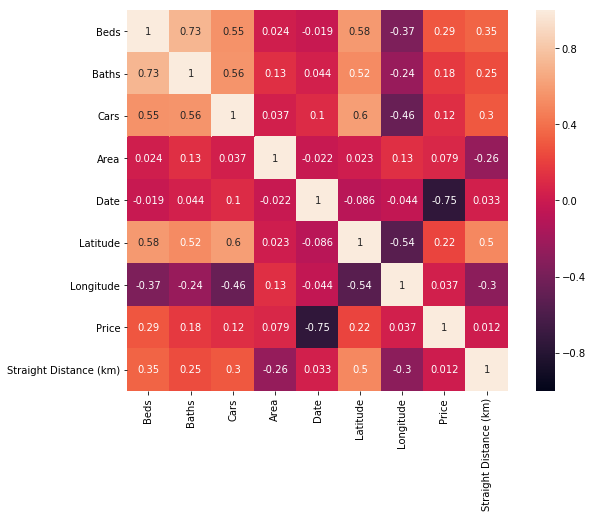

In [1119]:
# plot correlation map to see if there is any positive/negative relation among these attributes
# Price has the positive relations with beds, baths and cars. However, it is weird that the area has a negative
# relation with price
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, annot=True);

C:\Users\jing\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

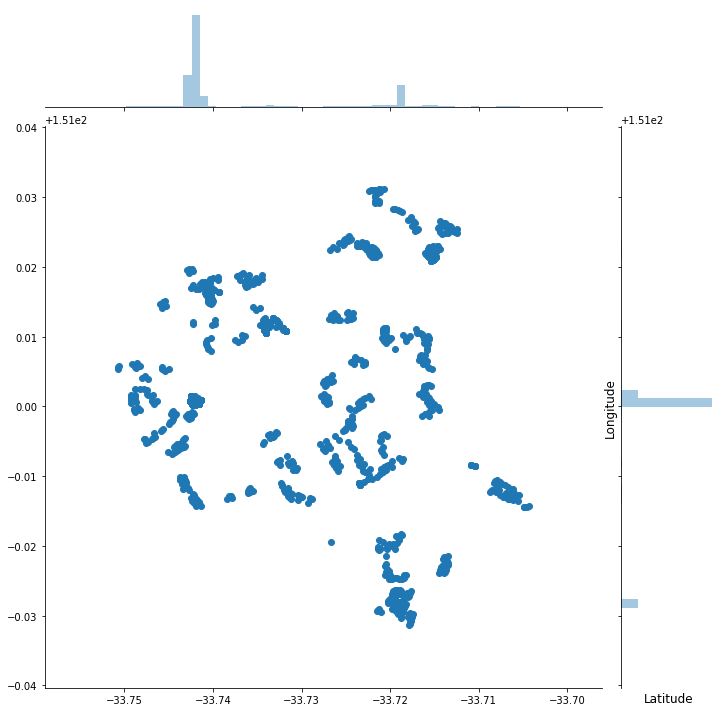

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [1120]:
# visulatize the location of the house we have chosen
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.jointplot(x= data.Latitude.values, y= data.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine


Text(0.5, 1.0, 'Pirce vs Area')

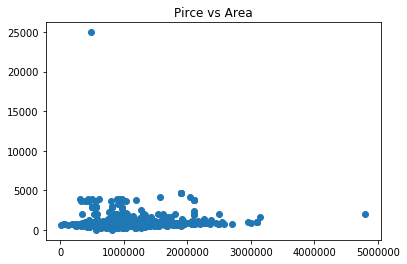

In [1121]:
plt.scatter(data.Price.values, data.Area.values)
plt.title('Pirce vs Area')

Text(0.5, 1.0, 'Price vs Longitude')

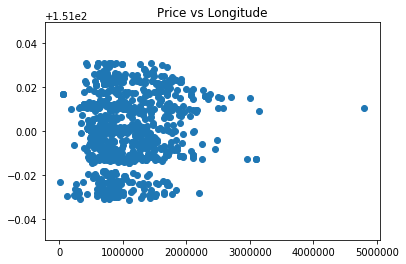

In [1122]:
plt.scatter(data.Price, data.Longitude)
plt.title('Price vs Longitude')

Text(0.5, 1.0, 'Price vs Latitude')

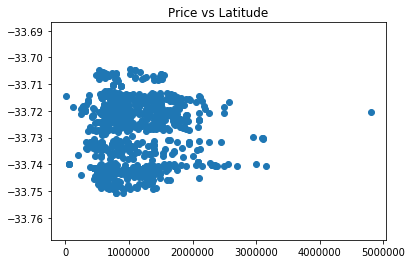

In [1123]:
plt.scatter(data.Price, data.Latitude)
plt.title('Price vs Latitude')

Text(0.5, 1.0, 'Price vs saled date')

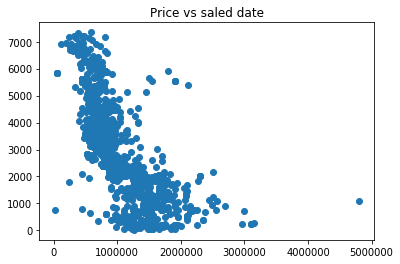

In [1124]:
plt.scatter(data.Price, data.Date)
plt.title('Price vs saled date')

Text(0.5, 1.0, 'Price vs cars')

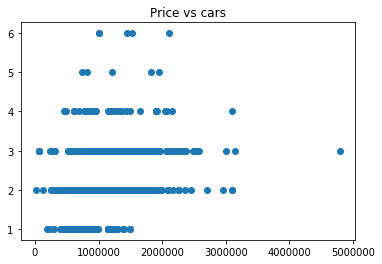

In [1125]:
plt.scatter(data.Price, data.Cars)
plt.title("Price vs cars")

Text(0.5, 1.0, 'Price vs Baths')

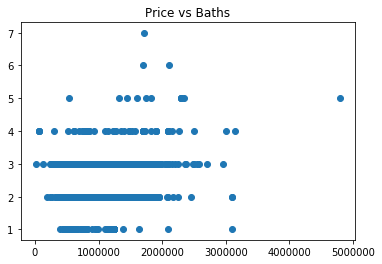

In [1126]:
plt.scatter(data.Price, data.Baths)
plt.title('Price vs Baths')

Text(0.5, 1.0, 'Price vs Beds')

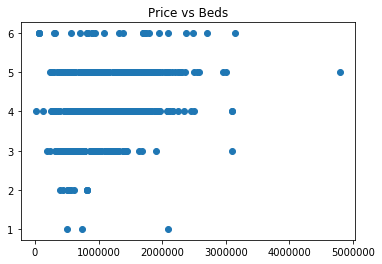

In [1127]:
plt.scatter(data.Price, data.Beds)
plt.title('Price vs Beds')

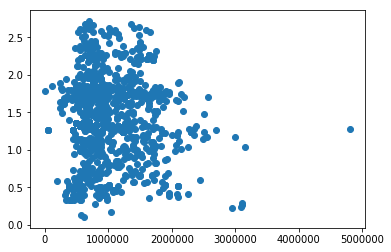

In [1128]:
plt.scatter(data.Price, data['Straight Distance (km)'])

# one-hot encoding
For the regression method such as deep learning neural network, the string data is not acceptable. So we have to use encode the Ptye attribute using one-hot encoding

In [1129]:
data.drop(columns=['Address', 'Closest Station', 'Ptype'], inplace=True)

In [1130]:
#  data = pd.get_dummies(data, columns=['Ptype','Closest Station'])
# data = pd.get_dummies(data, columns=['Ptype'])

# Train-Test Split

In [1131]:
# the target value
y = data['Price'].values.reshape(-1)

In [1132]:
# training data
x = data.drop(columns=['Price']).values

In [1133]:
# split it into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)

C:\Users\jing\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4182, 8), (1046, 8), (4182,), (1046,))

In [1139]:
X_train[0]

array([  3.        ,   1.        ,   2.        , 696.        ,
       811.        , -33.7418251 , 151.0003142 ,   1.30611335])

# Min Max Normalisation

We found that for our dataset, the model performs better in the data without normalisation


In [1095]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_train[:,3:7] = scaler.fit_transform(X_train[:,3:7])
# X_test[:,3:7] = scaler.fit_transform(X_test[:,3:7])

# Linear Regression

In [1096]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1097]:
# performance score is R squared
regressor.score(X_test, y_test)

0.6802488299524905

# Random Forest Tree

In [1098]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 180, max_depth=5, random_state=42)
# train the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1099]:
rf.score(X_test, y_test)

0.8712071397334583

# Gradinet Boosting Regressor

In [1100]:

clf = GradientBoostingRegressor(n_estimators=200, max_depth=4, 
                                random_state=42, learning_rate=0.05, loss='ls', min_samples_split=2)

In [1101]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [1102]:
clf.score(X_test, y_test)

0.8820382438141846

# Save Model

In [1103]:
import joblib

In [1104]:
# save the model to disk
filename = './models/NSW2154.sav'
# joblib.dump(clf, open(filename, 'wb'))

In [1105]:
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8820382438141846


In [1147]:
np.array([3, 3, 1, 400, 20, -33.7, 151.4, 1.5]).reshape(1,-1).shape

(1, 8)

In [1152]:
loaded_model.predict(np.array([3, 3, 1, 400, 20, -33.7, 151.4, 1.5]).reshape(1,-1))

1611461.3492248917